# Clustering with KMeans Algorithm

In this Project I have taken Iris dataset and clustered them based on petal length and petal width.

In [3]:
# Importing necessary libraries

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
flower = pd.DataFrame(iris.data,columns=iris.feature_names)
flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Petal Width (cm)')

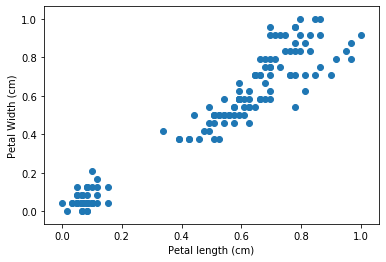

In [31]:
plt.scatter(flower['petal length (cm)'],flower['petal width (cm)'])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal Width (cm)')

In [20]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(flower[['petal length (cm)','petal width (cm)']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
flower['cluster'] = y_predicted
flower.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [24]:
flower = flower.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns')
flower.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [29]:
# preprocessing using min max scalar

Scaler = MinMaxScaler()
Scaler.fit(flower[['petal length (cm)']])
flower['petal length (cm)'] = Scaler.transform(flower[['petal length (cm)']])

Scaler.fit(flower[['petal width (cm)']])
flower['petal width (cm)'] = Scaler.transform(flower[['petal width (cm)']])

flower.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


No handles with labels found to put in legend.


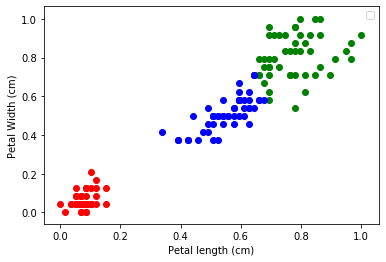

In [32]:
flower1 = flower[flower.cluster==0]
flower2 = flower[flower.cluster==1]
flower3 = flower[flower.cluster==2]


plt.scatter(flower1['petal length (cm)'],flower1['petal width (cm)'],color = 'green')
plt.scatter(flower2['petal length (cm)'],flower2['petal width (cm)'],color = 'red')
plt.scatter(flower3['petal length (cm)'],flower3['petal width (cm)'],color = 'blue')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

In [39]:
# Elbow Plot
sse = []
k_rng = range(1,10)
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(flower[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

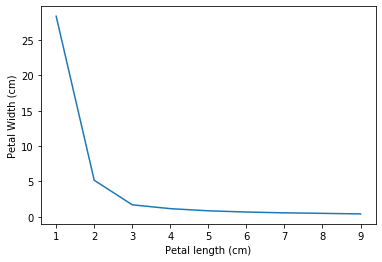

In [40]:
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal Width (cm)')
plt.plot(k_rng,sse)